# Notebook 02: Exploratory Data Analysis

This notebook explores the data cleaned in [Notebook 1: Data Cleaning](01_data_cleaning.ipynb).

In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import warnings

# custom function imports
from custom_functions import *

In [27]:
df_models = pd.read_csv('../data/cleaned_datasets/df_models.csv')

df_quarterly = pd.read_csv('../cleaned_datasets/models_quarterly_sales.csv')

## Value counts per category

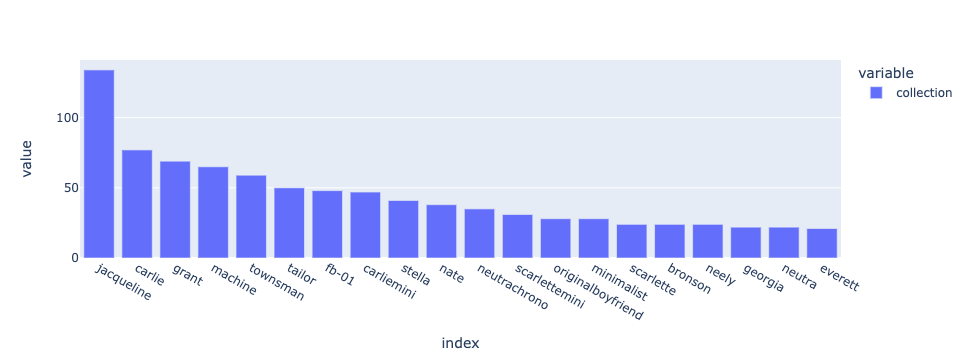

In [28]:
# This shows the 20 most common collection types for the different models
px.bar(df_models['collection'].value_counts()[0:20])

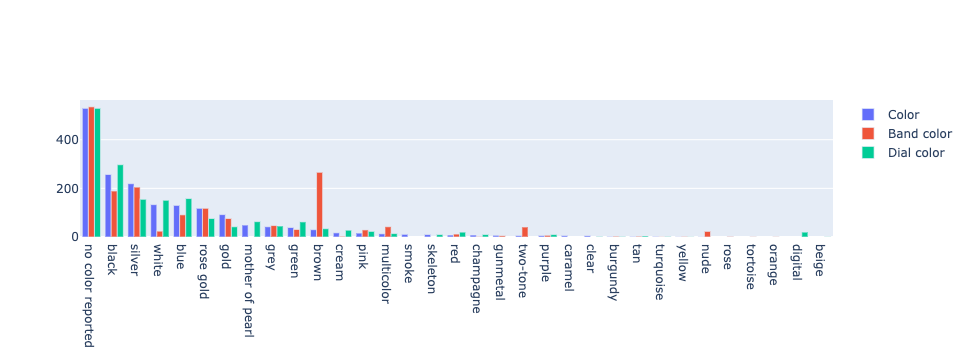

In [29]:
import plotly.graph_objects as go
colors = dict(df_models['color'].value_counts())
band_colors = dict(df_models['band_color'].value_counts())
dial_colors = dict(df_models['dial_color'].value_counts())

fig = go.Figure(data=[
    go.Bar(name='Color', x=list(colors.keys()), y=list(colors.values())),
    go.Bar(name='Band color', x=list(band_colors.keys()), y=list(band_colors.values())),
    go.Bar(name='Dial color', x=list(dial_colors.keys()), y=list(dial_colors.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Many watches don't have a color reported in all categories, but some of the most popular colors are popular across all features, with exception of white as the band color (less common) and brown as the band color (more common)

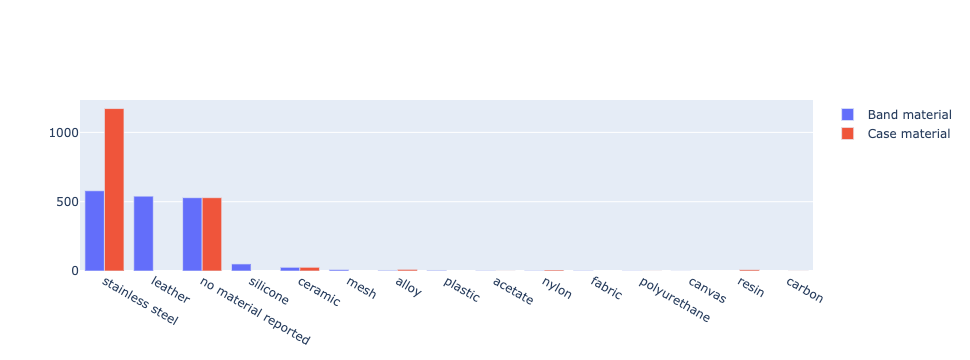

In [30]:
band_materials = dict(df_models['band_material'].value_counts())
case_materials = dict(df_models['case_material'].value_counts())

fig = go.Figure(data=[
    go.Bar(name='Band material', x=list(band_materials.keys()), y=list(band_materials.values())),
    go.Bar(name='Case material', x=list(case_materials.keys()), y=list(case_materials.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

While stainless steel is an extremely common material for cases, it is rivaled by leather for bands. The rest of the materials are very uncommon compared to those two options.

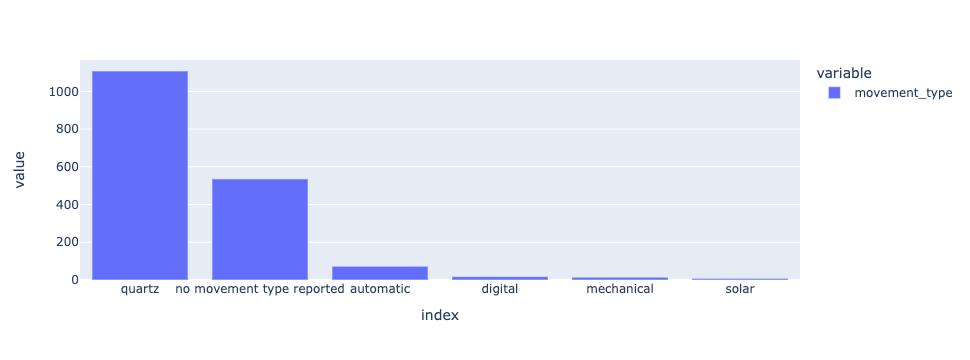

In [31]:
# few are "A" priority, but together with the 2022 new models, they are about the same as the "B" and "C" category
px.bar(df_models['movement_type'].value_counts())

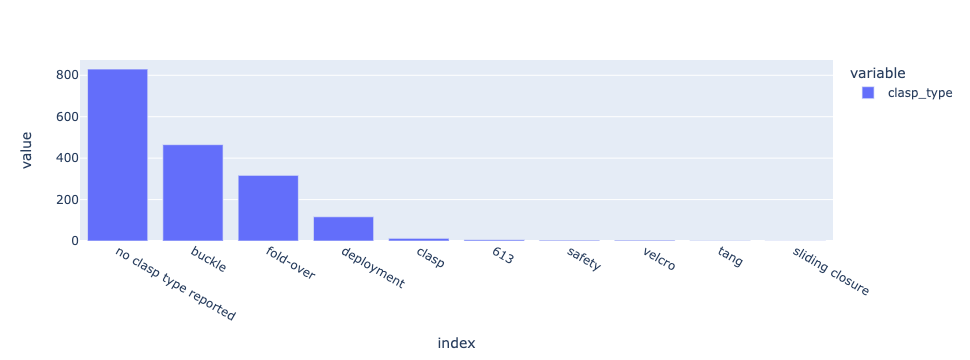

In [32]:
px.bar(df_models['clasp_type'].value_counts())

Several different types of clasps, although there is a top 3. Does this have an impact?

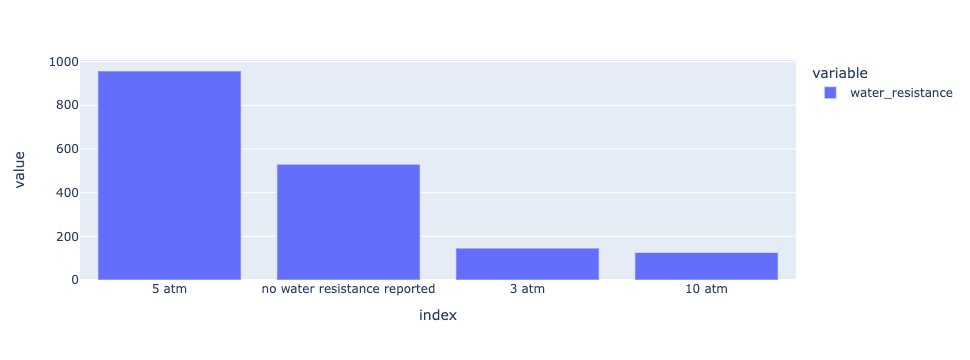

In [33]:
px.bar(df_models['water_resistance'].value_counts())

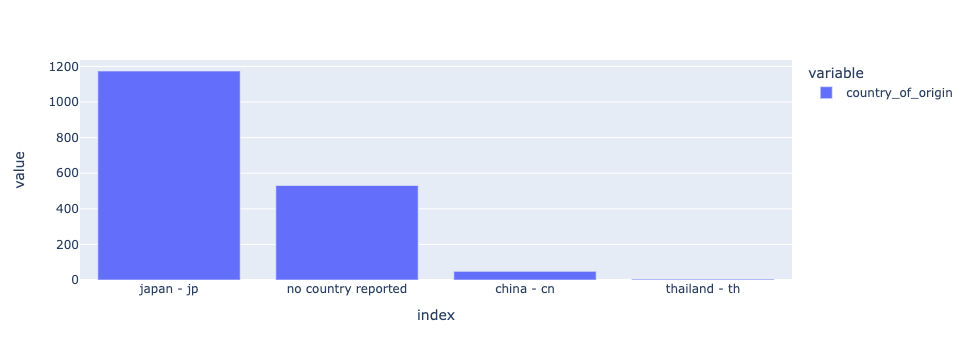

In [34]:
px.bar(df_models['country_of_origin'].value_counts())

Most watches manufactured in Japan, although there are some in other countries. I wonder if this has some luxury aspect to it.

In [35]:
df_models['warranty'].value_counts()

2 - year international limited warranty    1227
no warranty reported                        529
1 - year international limited warranty       3
Name: warranty, dtype: int64

Almost all watches where we know the warranty are 2 year, but some are 1 year. Could this influence purchases?

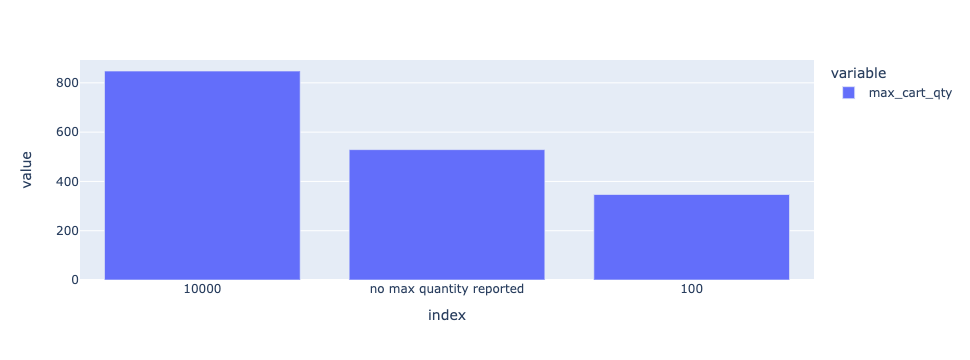

In [36]:
px.bar(df_models['max_cart_qty'].value_counts())

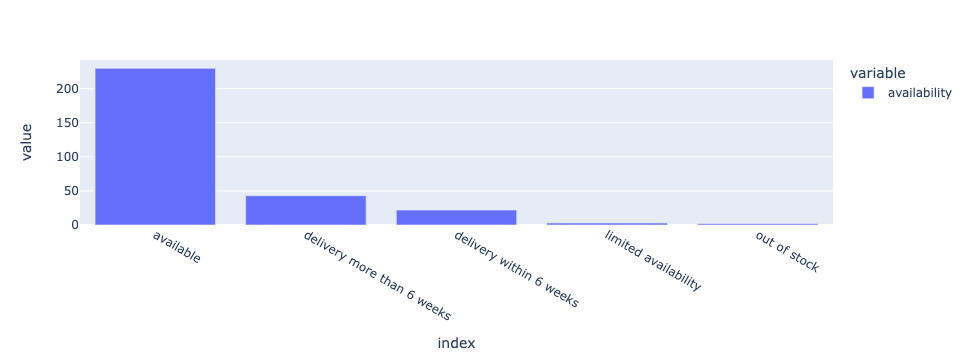

In [37]:
px.bar(df_models['availability'].value_counts())

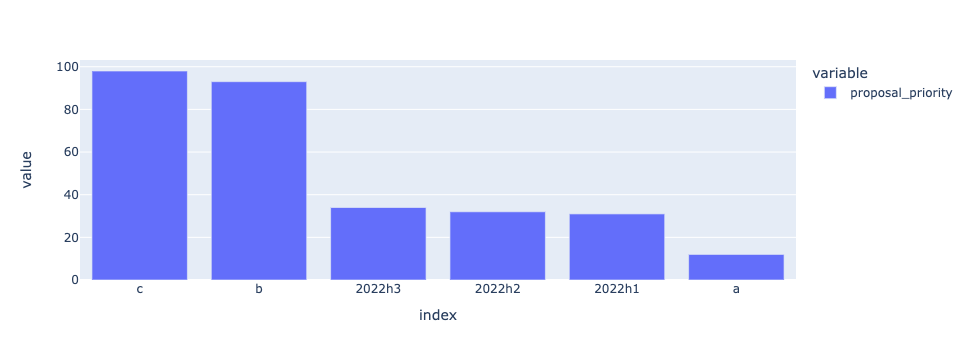

In [38]:
# few are "A" priority, but together with the 2022 new models, they are about the same as the "B" and "C" category
px.bar(df_models['proposal_priority'].value_counts())

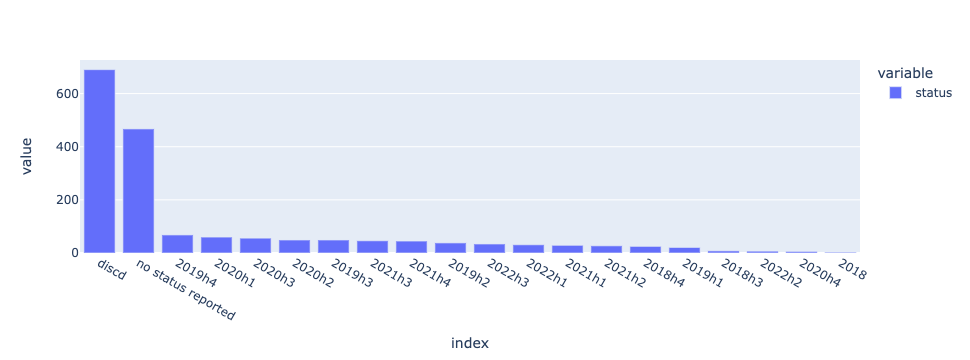

In [39]:
px.bar(df_models['status'].value_counts())

Most watches are discontinued or do not have a reported status. Each quarter usually has 25-50 models released.

### Analyze sales data

In [40]:
sales = return_date_col(df_models.groupby('collection').sum())

In [41]:
sales.T

collection  abilene  andyandaddisonset  annette  arc-01  arc-02  arc-03  \
2015-01         0.0                0.0      0.0     0.0     0.0     0.0   
2015-02         0.0                0.0      0.0     0.0     0.0     0.0   
2015-03         0.0                0.0      0.0     0.0     0.0     0.0   
2015-04         0.0                0.0      0.0     0.0     0.0     0.0   
2015-05         0.0                0.0      0.0     0.0     0.0     0.0   
...             ...                ...      ...     ...     ...     ...   
2022-08         0.0                0.0      0.0     0.0     0.0     0.0   
2022-09         0.0                0.0      0.0     0.0     0.0     0.0   
2022-10         0.0                0.0      0.0     0.0     0.0     0.0   
2022-11         0.0                0.0      0.0     0.0     0.0     0.0   
2022-12         0.0                0.0      0.0     0.0     0.0     0.0   

collection  atwater  avondale  barstow  barstowauto  ...  townsmanauto  \
2015-01         0.0       0.0      0.0          0.0  ...           0.0   
2015-02         0.0       0.0      0.0          0.0  ...           0.0   
2015-03         0.0       0.0      0.0          0.0  ...           0.0   
2015-04         0.0       0.0      0.0          0.0  ...           0.0   
2015-05         0.0       0.0      0.0          0.0  ...           0.0   
...             ...       ...      ...          ...  ...           ...   
2022-08         0.0       0.0      0.0          0.0  ...           0.0   
2022-09         0.0       0.0      0.0          0.0  ...           0.0   
2022-10         0.0       0.0      0.0          0.0  ...           0.0   
2022-11         0.0       0.0      0.0          0.0  ...           0.0   
2022-12         0.0       0.0      0.0          0.0  ...           0.0   

collection  typographer  urbantraveler  vintage  vintage54  \
2015-01             0.0            0.0      0.0        0.0   
2015-02             0.0            0.0      0.0        0.0   
2015-03             0.0            0.0      0.0        0.0   
2015-04             0.0            0.0      0.0        0.0   
2015-05             0.0            0.0      0.0        0.0   
...                 ...            ...      ...        ...   
2022-08             0.0            0.0      0.0        0.0   
2022-09             0.0            0.0      0.0        0.0   
2022-10             0.0            0.0      0.0        0.0   
2022-11             0.0            0.0      0.0        0.0   
2022-12             0.0            0.0      0.0        0.0   

collection  vintage54chronotimer  vintagemuse   virginia  virginiaboxset  \
2015-01                      0.0     2.518519  20.148148             0.0   
2015-02                      0.0     2.518519  20.148148             0.0   
2015-03                      0.0     2.518519  20.148148             0.0   
2015-04                      0.0     2.518519  20.148148             0.0   
2015-05                      0.0     2.518519  20.148148             0.0   
...                          ...          ...        ...             ...   
2022-08                      0.0     0.000000   0.000000             0.0   
2022-09                      0.0     0.000000   0.000000             0.0   
2022-10                      0.0     0.000000   0.000000             0.0   
2022-11                      0.0     0.000000   0.000000             0.0   
2022-12                      0.0     0.000000   0.000000             0.0   

collection  winnie  
2015-01        0.0  
2015-02        0.0  
2015-03        0.0  
2015-04        0.0  
2015-05        0.0  
...            ...  
2022-08        0.0  
2022-09        0.0  
2022-10        0.0  
2022-11        0.0  
2022-12        0.0  

[96 rows x 186 columns]

In [42]:
sales_style = return_sales(df_models, 'style_id')

In [43]:
sales_collection = return_sales(df_models, 'collection')

Successfully added 12 months to 2019 yearly sales
Successfully added 12 months to 2020 yearly sales
Successfully added 12 months to 2021 yearly sales


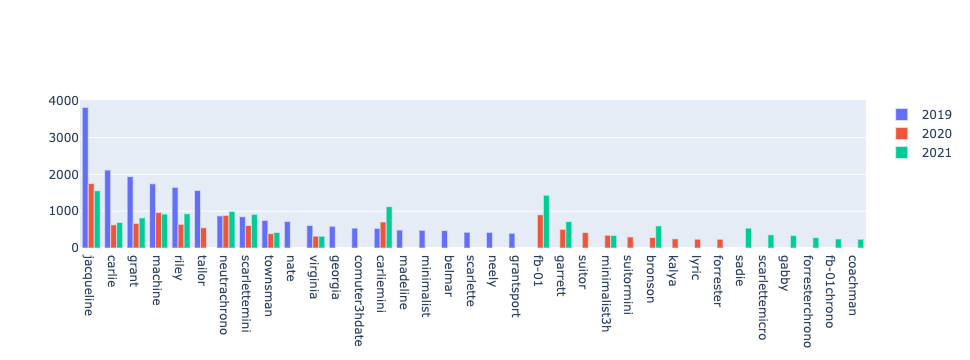

In [44]:
import plotly.graph_objects as go
top_collections_2019 = dict(monthly_to_yearly(df_models.groupby(by = 'collection').sum(), '2019').sort_values(ascending=False)[0:20])
top_collections_2020 = dict(monthly_to_yearly(df_models.groupby(by = 'collection').sum(), '2020').sort_values(ascending=False)[0:20])
top_collections_2021 = dict(monthly_to_yearly(df_models.groupby(by = 'collection').sum(), '2021').sort_values(ascending=False)[0:20])

fig = go.Figure(data=[
    go.Bar(name='2019', x=list(top_collections_2019.keys()), y=list(top_collections_2019.values())),
    go.Bar(name='2020', x=list(top_collections_2020.keys()), y=list(top_collections_2020.values())),
    go.Bar(name='2021', x=list(top_collections_2021.keys()), y=list(top_collections_2021.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Successfully added 12 months to 2019 yearly sales
Successfully added 12 months to 2020 yearly sales
Successfully added 12 months to 2021 yearly sales


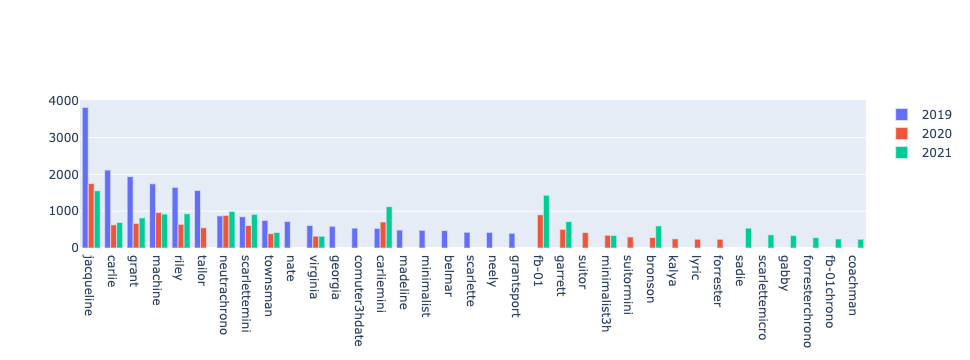

In [45]:
import plotly.graph_objects as go
top_collections_2019 = dict(monthly_to_yearly(df_models.groupby(by = 'collection').sum(), '2019').sort_values(ascending=False)[0:20])
top_collections_2020 = dict(monthly_to_yearly(df_models.groupby(by = 'collection').sum(), '2020').sort_values(ascending=False)[0:20])
top_collections_2021 = dict(monthly_to_yearly(df_models.groupby(by = 'collection').sum(), '2021').sort_values(ascending=False)[0:20])

fig = go.Figure(data=[
    go.Bar(name='2019', x=list(top_collections_2019.keys()), y=list(top_collections_2019.values())),
    go.Bar(name='2020', x=list(top_collections_2020.keys()), y=list(top_collections_2020.values())),
    go.Bar(name='2021', x=list(top_collections_2021.keys()), y=list(top_collections_2021.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Successfully added 12 months to 2022 yearly sales


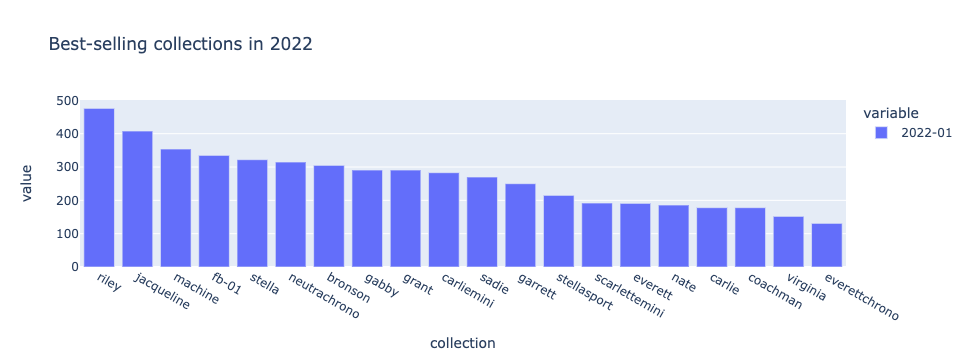

In [46]:
px.bar(monthly_to_yearly(df_models.groupby(by = 'collection').sum(), '2022').sort_values(ascending=False)[0:20],title='Best-selling collections in 2022')

It seems that watch sales were much greater in 2019 than in 2021 or 2022. Some watches gained in popularity however. Let's explore this further.

In [47]:
df_models.columns

Index(['style_id', 'max_cart_qty', 'availability', 'qty_on_hand',
       'qty_on_order', 'qty_total_inv', 'qty_sold_last_6m', 'qty_avg/mo',
       'months_of_supply', 'xyz_cost',
       ...
       '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
       '2022-09', '2022-10', '2022-11', '2022-12'],
      dtype='object', length=125)

In [48]:
years = ['2015', '2016', '2017', '2018', '2019', '2020',
       '2021','2022']
[monthly_to_yearly(df_models.groupby(by = 'collection').sum(),year).sum() for year in years]

Successfully added 12 months to 2015 yearly sales
Successfully added 12 months to 2016 yearly sales
Successfully added 12 months to 2017 yearly sales
Successfully added 12 months to 2018 yearly sales
Successfully added 12 months to 2019 yearly sales
Successfully added 12 months to 2020 yearly sales
Successfully added 12 months to 2021 yearly sales
Successfully added 12 months to 2022 yearly sales


[7430.0, 19811.0, 34000.0, 40360.0, 26968.0, 16970.0, 19745.0, 7025.0]

Successfully added 12 months to 2015 yearly sales
Successfully added 12 months to 2016 yearly sales
Successfully added 12 months to 2017 yearly sales
Successfully added 12 months to 2018 yearly sales
Successfully added 12 months to 2019 yearly sales
Successfully added 12 months to 2020 yearly sales
Successfully added 12 months to 2021 yearly sales
Successfully added 12 months to 2022 yearly sales


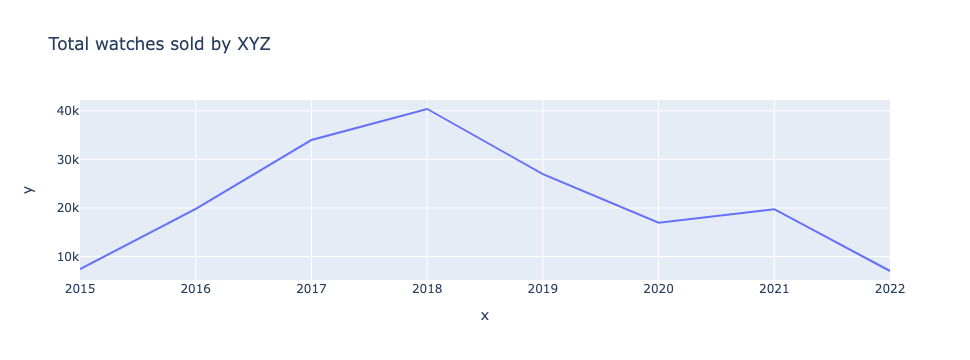

In [49]:
years = ['2015', '2016', '2017', '2018', '2019', '2020',
       '2021','2022']
px.line(x=years, y = [monthly_to_yearly(df_models.groupby(by = 'collection').sum(),year).sum() for year in years],
       title="Total watches sold by XYZ")

In [50]:
for index in df_models.index:
    for year in years:
        df_models.loc[index,f'{year}_rev'] = (monthly_to_yearly(df_models,year)[index]*df_models.loc[index,'wholesale_price'])

Successfully added 12 months to 2015 yearly sales
Successfully added 12 months to 2016 yearly sales
Successfully added 12 months to 2017 yearly sales
Successfully added 12 months to 2018 yearly sales
Successfully added 12 months to 2019 yearly sales
Successfully added 12 months to 2020 yearly sales
Successfully added 12 months to 2021 yearly sales
Successfully added 12 months to 2022 yearly sales
Successfully added 12 months to 2015 yearly sales
Successfully added 12 months to 2016 yearly sales
Successfully added 12 months to 2017 yearly sales
Successfully added 12 months to 2018 yearly sales
Successfully added 12 months to 2019 yearly sales
Successfully added 12 months to 2020 yearly sales
Successfully added 12 months to 2021 yearly sales
Successfully added 12 months to 2022 yearly sales
Successfully added 12 months to 2015 yearly sales
Successfully added 12 months to 2016 yearly sales
Successfully added 12 months to 2017 yearly sales
Successfully added 12 months to 2018 yearly sales


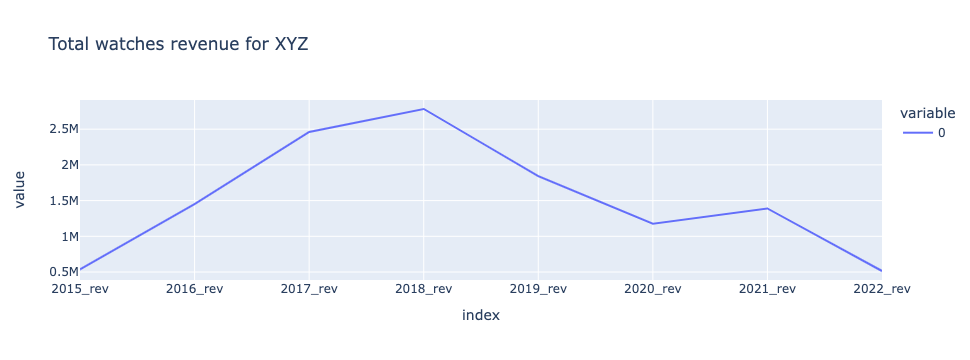

In [52]:
px.line(df_models.groupby(by = 'collection').sum().sum()[['2015_rev', '2016_rev', '2017_rev', '2018_rev',
       '2019_rev', '2020_rev', '2021_rev', '2022_rev']],title="Total watches revenue for XYZ")

Successfully added 12 months to 2022 yearly sales


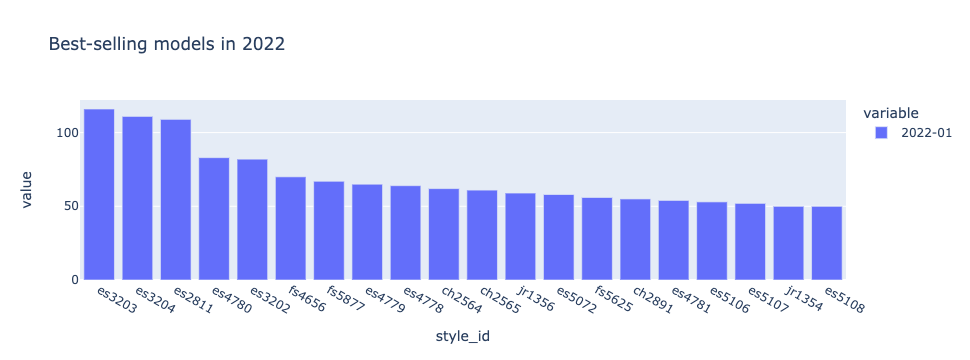

In [54]:
px.bar(monthly_to_yearly(df_models.groupby('style_id').sum(),'2022').sort_values(ascending=False)[0:20],title='Best-selling models in 2022')

Successfully added 12 months to 2021 yearly sales


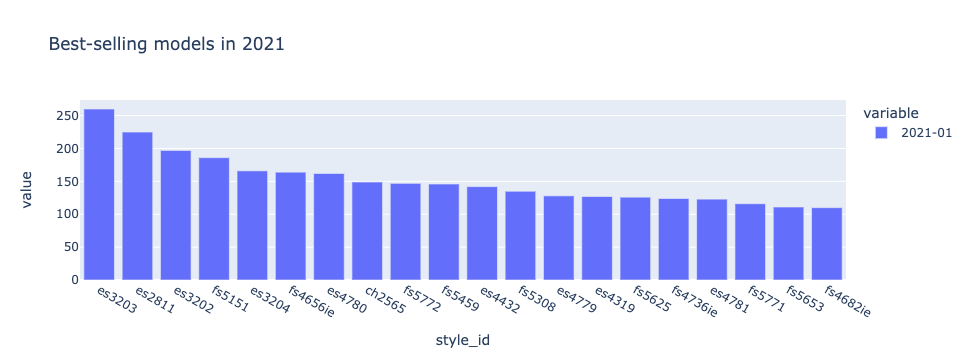

In [55]:
px.bar(monthly_to_yearly(df_models.groupby('style_id').sum(),'2021').sort_values(ascending=False)[0:20],title='Best-selling models in 2021')

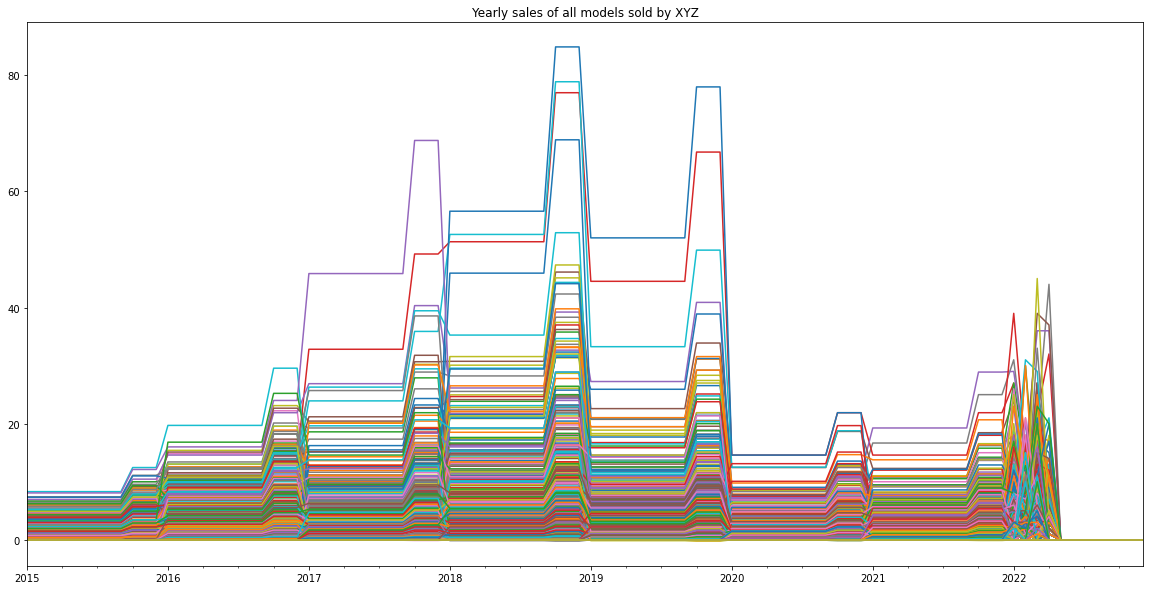

In [58]:
sales_style.plot(figsize = (20,10),legend=False,title='Yearly sales of all models sold by XYZ');

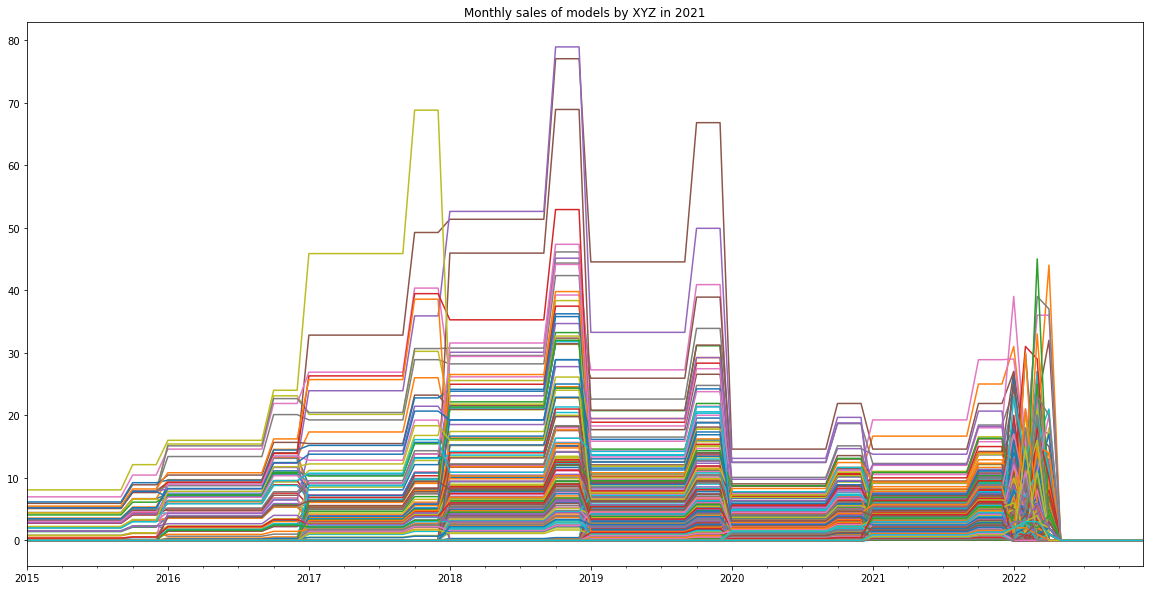

In [60]:
sales_style[list(sales_style.columns[sales_style.loc['2021',:].sum() > 0])].plot(figsize = (20,10),legend=False,title='Monthly sales of models by XYZ in 2021');

It seems that most models that sold in 2021 sold less than 20 models per month in 2021. There are some exceptions, which are the bestsellers

In [61]:
sales_style_yearly = sales_style.resample('Y').sum()

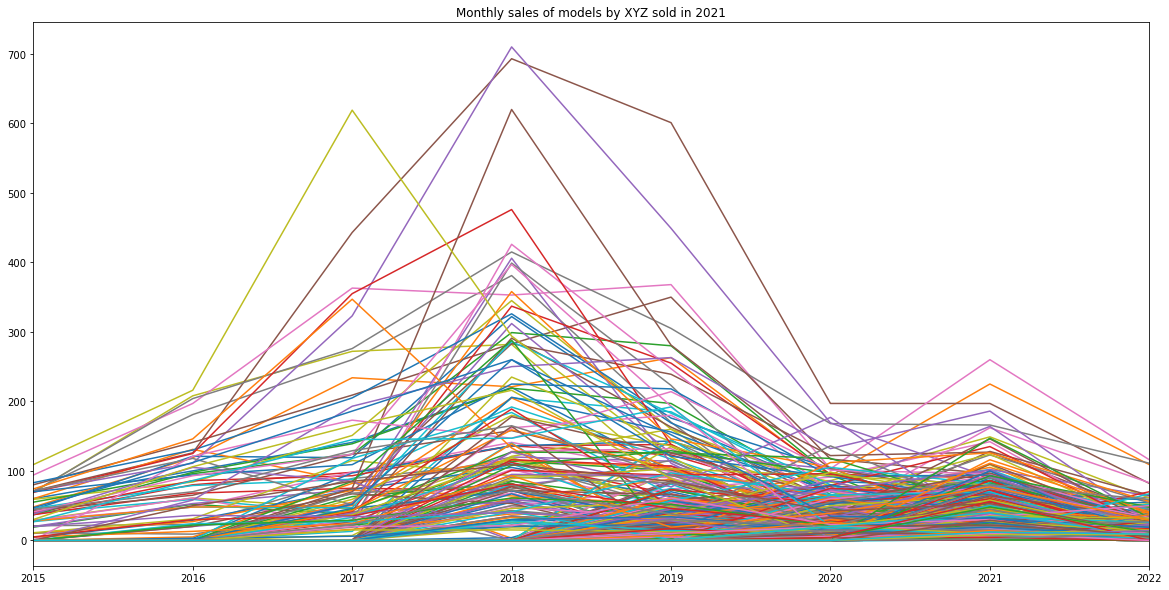

In [63]:
models_sold_2021 = []
for c in sales_style_yearly:
    if sales_style_yearly.loc['2021',c].values > 0:
        models_sold_2021.append(c)
        
sales_style_yearly[models_sold_2021].plot(figsize = (20,10),legend=False,title='Monthly sales of models by XYZ sold in 2021');

It seems that most models that sold in 2021 sold less than 100 models. There are some exceptions, which are the bestsellers

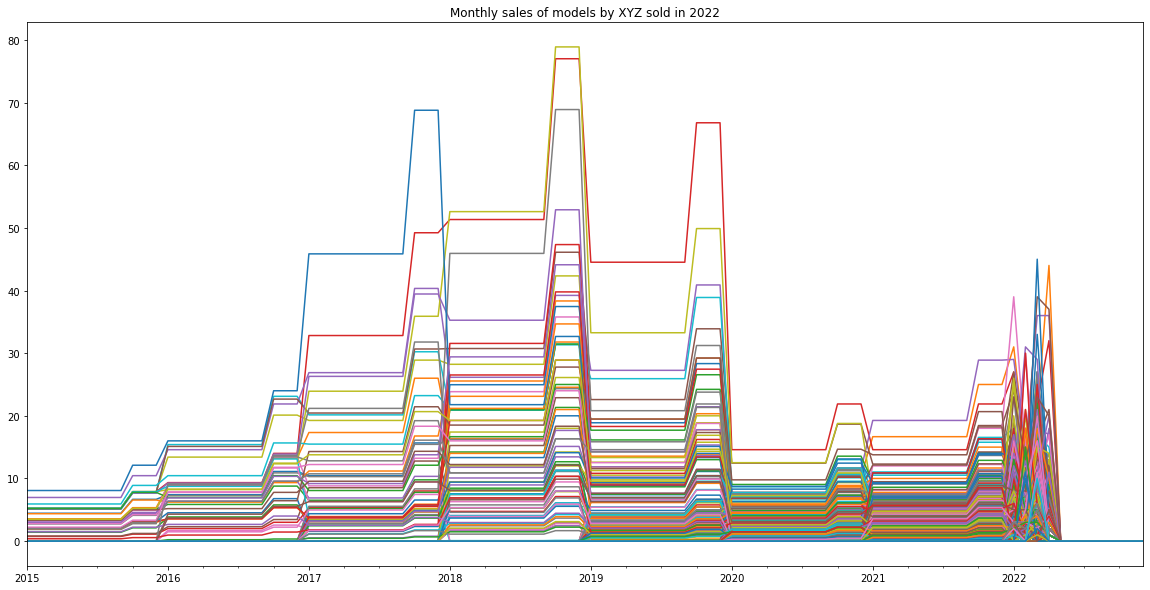

In [64]:
sales_style[list(sales_style.columns[sales_style.loc['2022',:].sum() > 0])].plot(figsize = (20,10),legend=False,title='Monthly sales of models by XYZ sold in 2022');

In [65]:
sales_collection_yearly = sales_collection.resample('Y').sum()

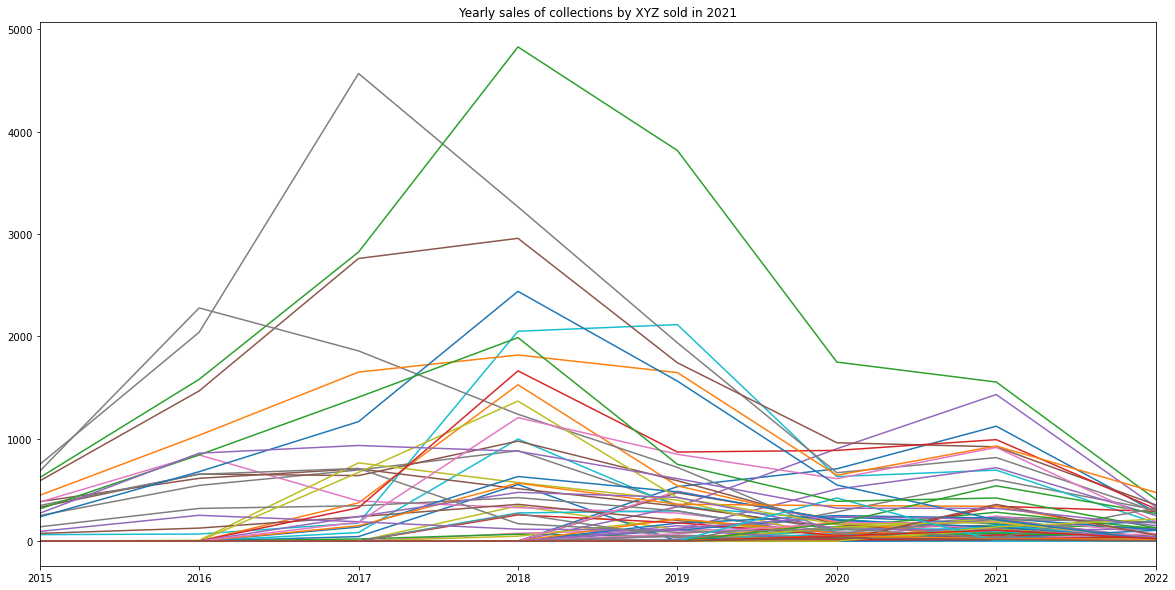

In [69]:
collections_sold_2021 = []
for c in sales_collection_yearly:
    if sales_collection_yearly.loc['2021',c].values > 0:
        collections_sold_2021.append(c)
        
sales_collection_yearly[collections_sold_2021].plot(figsize = (20,10),legend=False,title='Yearly sales of collections by XYZ sold in 2021');

Some collections are more successful than others, but the disparity has changed since 2018/2019

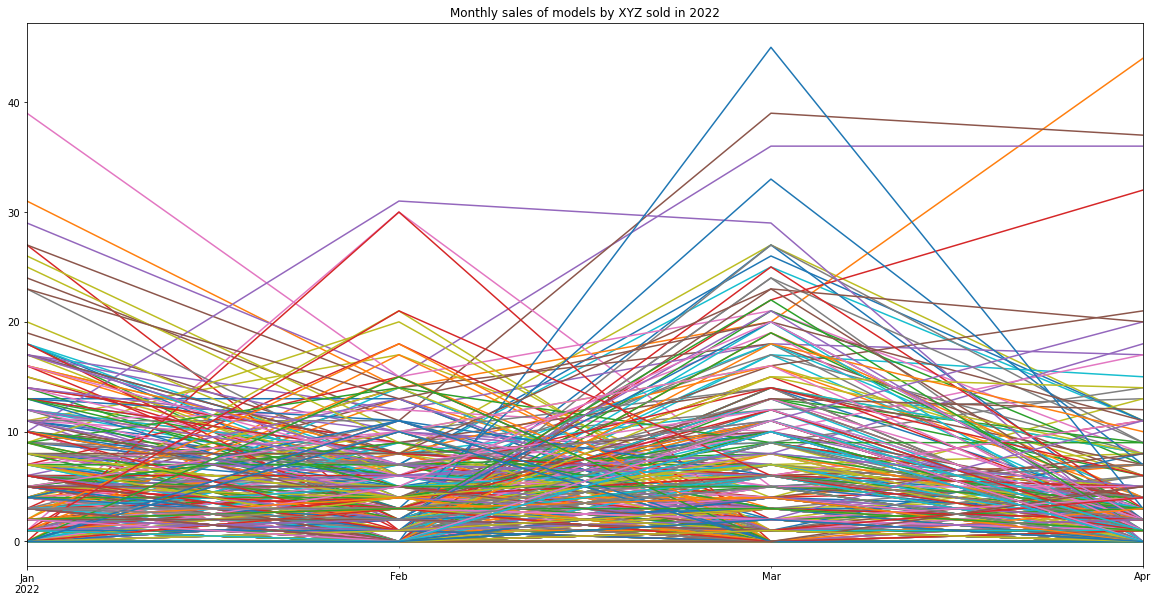

In [71]:
sales_style[list(sales_style.columns[sales_style.loc['2022',:].sum() > 0])].loc['2022-01':'2022-04',:].plot(figsize = (20,10),legend=False,title='Monthly sales of models by XYZ sold in 2022');

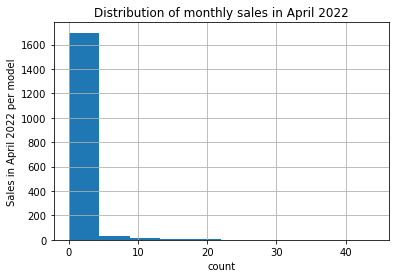

In [84]:
sales_style.loc['2022-04',:].T.hist()
plt.title('Distribution of monthly sales in April 2022')
plt.xlabel('count')
plt.ylabel('Sales in April 2022 per model');

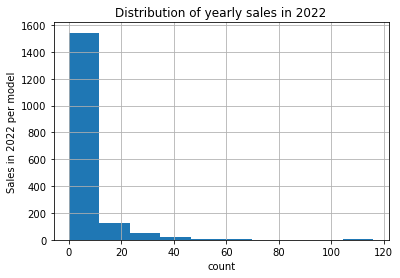

In [85]:
sales_style.loc['2022',:].sum().T.hist()
plt.title('Distribution of yearly sales in 2022')
plt.xlabel('count')
plt.ylabel('Sales in 2022 per model');

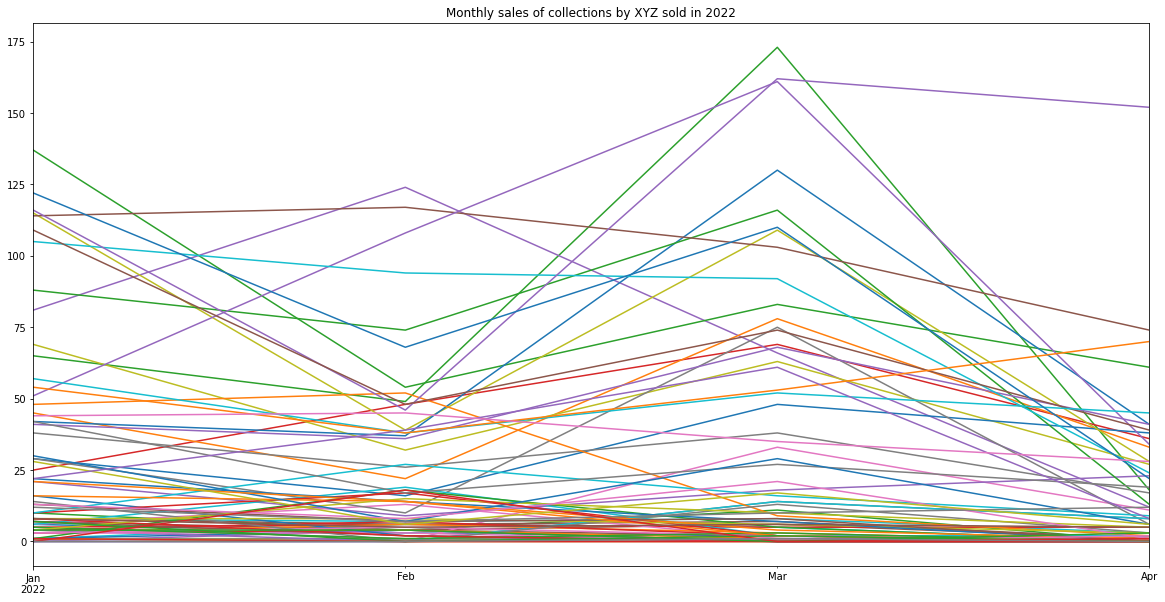

In [74]:
sales_collection[list(sales_collection.columns[sales_collection.loc['2022',:].sum() > 0])].loc['2022-01':'2022-04',:].plot(figsize = (20,10),legend=False,title='Monthly sales of collections by XYZ sold in 2022');